<a href="https://colab.research.google.com/github/quetion/Crypto_fin/blob/main/crypto_finance_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages
import numpy as np
import pandas as pd
import yfinance as yf


In [2]:
data = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
data = data[['Adj Close','Volume']]
data.head()

,Adj Close,Volume
Date,,
2014-09-17,457.334015,21056800
2014-09-18,424.440002,34483200
2014-09-19,394.795990,37919700
2014-09-20,408.903992,36863600
2014-09-21,398.821014,26580100


<Axes: xlabel='Date'>

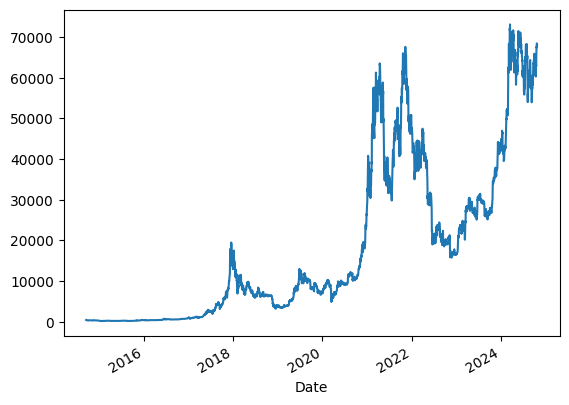

In [5]:
data['Adj Close'].plot()

<Axes: xlabel='Date'>

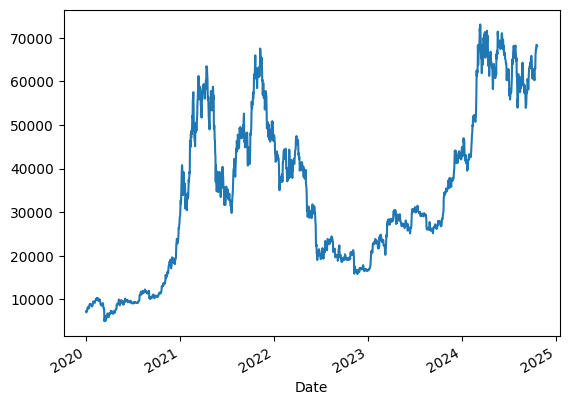

In [6]:
data['2020':]['Adj Close'].plot()

In [7]:
# download another coin
data_1 = yf.download('DOGE-USD')
data_1.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


In [8]:
data_1 = data_1[['Adj Close','Volume']]
data_1.head()

,Adj Close,Volume
Date,,
2017-11-09,0.001415,6259550
2017-11-10,0.001163,4246520
2017-11-11,0.001201,2231080
2017-11-12,0.001038,3288960
2017-11-13,0.001211,2481270


<Axes: xlabel='Date'>

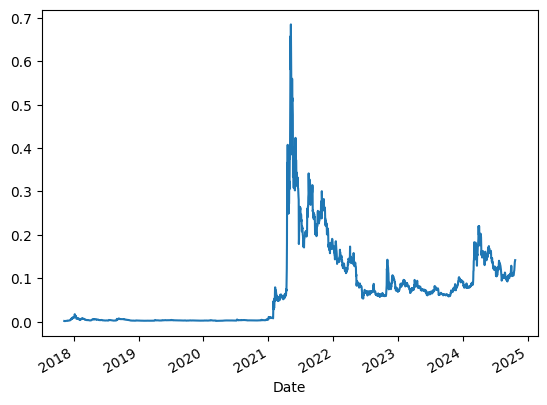

In [9]:
data_1['Adj Close'].plot()

<Axes: xlabel='Date'>

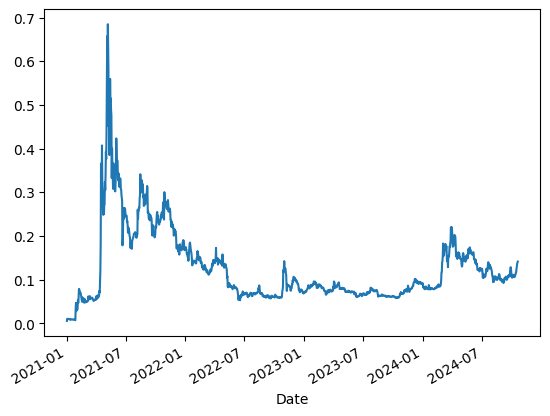

In [10]:
data_1['2021':]['Adj Close'].plot()

In [13]:
# data: BTC
# data_1: DOGE
data.columns = ['price_btc', 'volume_btc']

<ipython-input-13-c15d8827a433>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_1.cloumns = ['price_doge','volume_doge']


In [18]:
data_1.columns = ['price_doge','volume_doge']

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3686 entries, 2014-09-17 to 2024-10-20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price_btc   3686 non-null   float64
 1   volume_btc  3686 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 215.4 KB


In [19]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2537 entries, 2017-11-09 to 2024-10-20
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price_doge   2537 non-null   float64
 1   volume_doge  2537 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 124.0 KB


In [20]:
data_m = pd.merge(data, data_1, how='inner', left_index=True, right_index=True)
data_m.head()

,price_btc,volume_btc,price_doge,volume_doge
Date,,,,
2017-11-09,7143.580078,3226249984,0.001415,6259550
2017-11-10,6618.140137,5208249856,0.001163,4246520
2017-11-11,6357.600098,4908680192,0.001201,2231080
2017-11-12,5950.069824,8957349888,0.001038,3288960
2017-11-13,6559.490234,6263249920,0.001211,2481270


<Axes: xlabel='Date'>

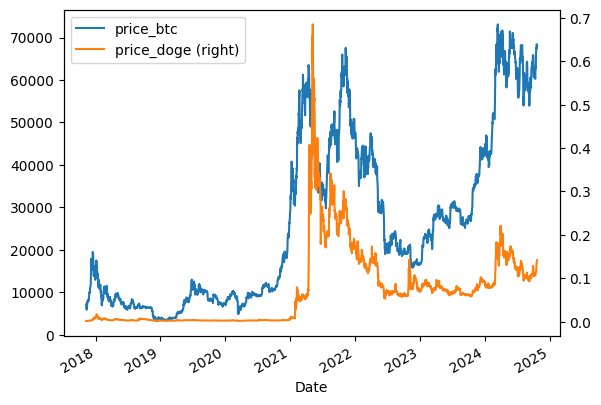

In [22]:
data_m[['price_btc','price_doge']].plot(secondary_y='price_doge')

<Axes: xlabel='Date'>

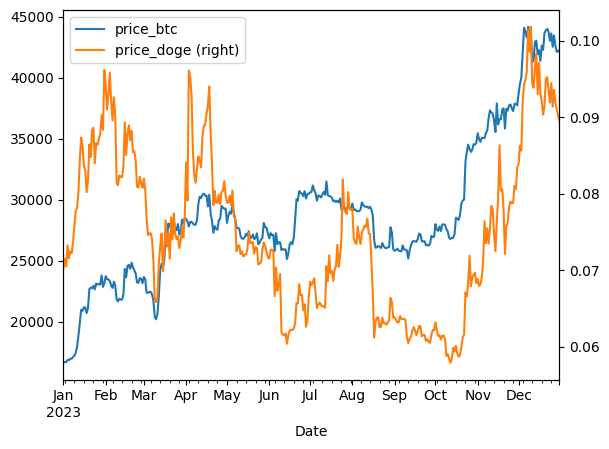

In [24]:
data_m['2023':'2023'][['price_btc','price_doge']].plot(secondary_y='price_doge')

In [28]:
# how to measure risks
test = data_m['2023':]
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 658 entries, 2023-01-01 to 2024-10-20
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price_btc    658 non-null    float64
 1   volume_btc   658 non-null    int64  
 2   price_doge   658 non-null    float64
 3   volume_doge  658 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 25.7 KB


In [29]:
test['ret_btc'] = test['price_btc'].pct_change()
test['ret_doge'] = test['price_doge'].pct_change()
test.head()

<ipython-input-29-6b41fdbfcc5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ret_btc'] = test['price_btc'].pct_change()
<ipython-input-29-6b41fdbfcc5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ret_doge'] = test['price_doge'].pct_change()


,price_btc,volume_btc,price_doge,volume_doge,ret_btc,ret_doge
Date,,,,,,
2023-01-01,16625.080078,9244361700,0.070225,185279750,NaN,NaN
2023-01-02,16688.470703,12097775227,0.071454,405800240,0.003813,0.017501
2023-01-03,16679.857422,13903079207,0.070468,283398864,-0.000516,-0.013799
2023-01-04,16863.238281,18421743322,0.073237,343264145,0.010994,0.039294
2023-01-05,16836.736328,13692758566,0.071550,424927580,-0.001572,-0.023035


In [31]:
test[['ret_btc','ret_doge']].describe()

,ret_btc,ret_doge
count,657.000000,657.000000
mean,0.002467,0.001905
std,0.025386,0.041277
min,-0.083434,-0.158400
25%,-0.009598,-0.019592
50%,0.000362,0.000472
75%,0.013785,0.020015
max,0.121443,0.214821


In [40]:
a = test['2024-09':'2024-09']['ret_btc'].mean()
b = test['2024-10':'2024-10']['ret_btc'].mean()
print(a,b)

0.0026242249231443805 0.004035924203867097
